# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
my_api_key = weather_api_key
my_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = my_url + "q=" + cities[i] + "&APPID=" + my_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | peniscola
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | al bawiti
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | kimbe
Processing Record 11 of Set 1 | nadym
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | brisas de zicatela
Processing Record 14 of Set 1 | staraya stanitsa
Processing Record 15 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 16 of Set 1 | cueibet
City not found. Skipping...
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | lalganj
Processing Record 20 of Set 1 | tindouf
Processing Record 21 of Set 1 | jamestown
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-18.87,97,100,2.43,CA,1708484833
1,peniscola,40.3359,0.3613,12.60,62,26,2.67,ES,1708484834
2,port-aux-francais,-49.3500,70.2167,7.86,90,100,16.05,TF,1708484834
3,waitangi,-43.9535,-176.5597,15.46,63,14,2.68,NZ,1708484835
4,al bawiti,28.3492,28.8659,10.89,57,11,2.91,EG,1708484835


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-18.87,97,100,2.43,CA,1708484833
1,peniscola,40.3359,0.3613,12.60,62,26,2.67,ES,1708484834
2,port-aux-francais,-49.3500,70.2167,7.86,90,100,16.05,TF,1708484834
3,waitangi,-43.9535,-176.5597,15.46,63,14,2.68,NZ,1708484835
4,al bawiti,28.3492,28.8659,10.89,57,11,2.91,EG,1708484835


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

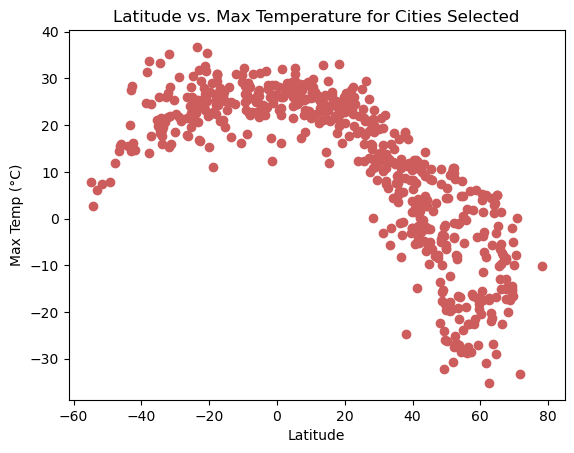

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color = "indianred")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (" + chr(176) + 'C)')
plt.title("Latitude vs. Max Temperature for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

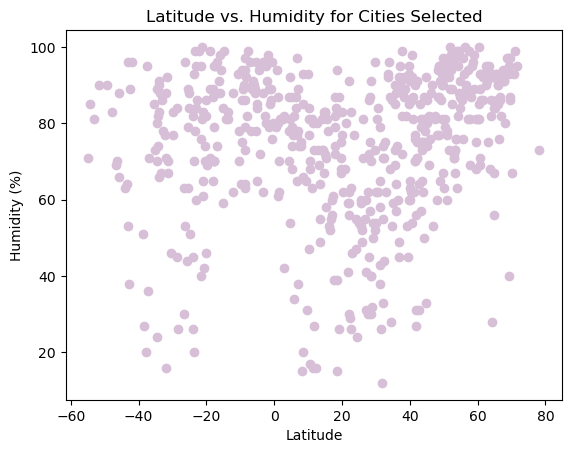

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = "thistle")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

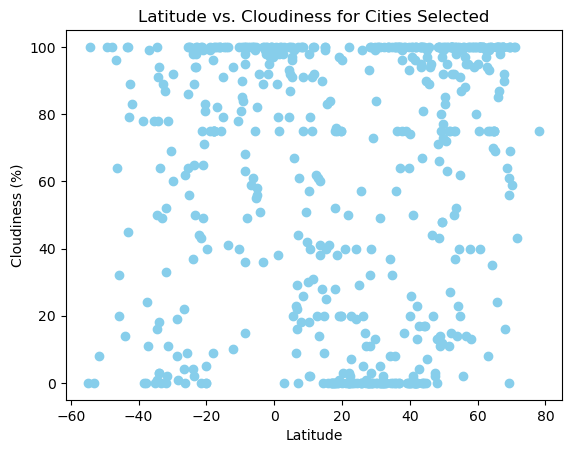

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = "skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

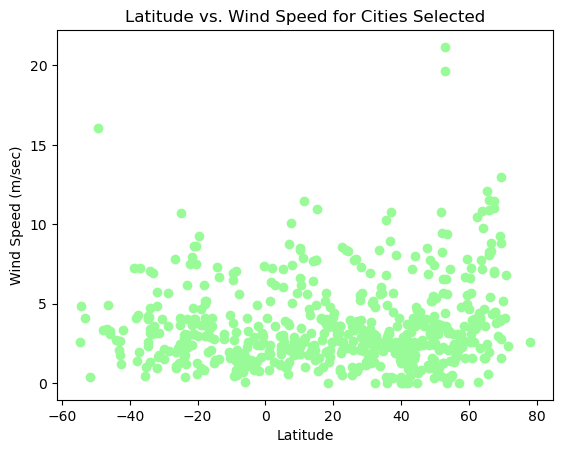

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = "palegreen")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/sec)")
plt.title("Latitude vs. Wind Speed for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x, 
                      y, 
                      x_label, 
                      y_label, 
                      plot_title, 
                      dotcolor,
                      text_x,
                      text_y):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Print the r-value
    print("The r-value is ", r_value)

    # Plot the data and regression line
    plt.scatter(x, y, color = dotcolor)
    plt.plot(x, slope * x + intercept, color='mediumblue', label='Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.legend()

    # Put linear regression equation on plot
    regression_equation_str = "y = " + str(float(f'{slope: .2f}')) + "*x + " + str(float(f'{intercept: .2f}'))
    plt.text(text_x, text_y, regression_equation_str, c="mediumblue", fontsize = 'x-large')

    # Show plot
    plt.show()

    # Return 
    return

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-18.87,97,100,2.43,CA,1708484833
1,peniscola,40.3359,0.3613,12.60,62,26,2.67,ES,1708484834
4,al bawiti,28.3492,28.8659,10.89,57,11,2.91,EG,1708484835
8,enewetak,11.3474,162.3373,26.12,80,100,11.44,MH,1708484837
10,nadym,65.5333,72.5167,-10.09,93,100,12.12,RU,1708484839


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,7.86,90,100,16.05,TF,1708484834
3,waitangi,-43.9535,-176.5597,15.46,63,14,2.68,NZ,1708484835
5,alice springs,-23.7000,133.8833,36.75,20,2,3.09,AU,1708484836
6,ushuaia,-54.8000,-68.3000,7.81,71,0,2.57,AR,1708484836
7,invercargill,-46.4000,168.3500,15.57,70,64,4.92,NZ,1708484837


###  Temperature vs. Latitude Linear Regression Plot

The r-value is  -0.8446866985183376


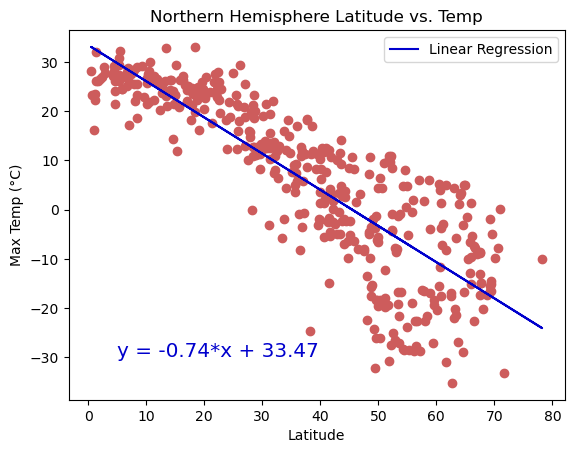

In [15]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Max Temp (" + chr(176) + "C)", 
                  "Northern Hemisphere Latitude vs. Temp", 
                  "indianred",
                  5,
                  -30)

The r-value is  0.49392722386036547


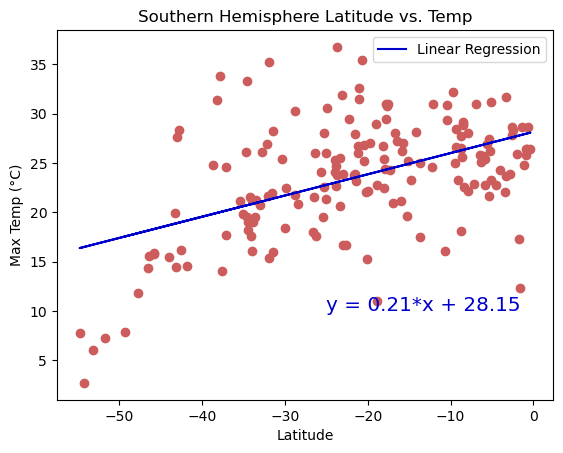

In [16]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Max Temp']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Max Temp (" + chr(176) + "C)", 
                  "Southern Hemisphere Latitude vs. Temp", 
                  "indianred",
                  -25,
                  10)

**Discussion about the linear relationship:** Here we can see that the maximum recorded temperature gets higher the closer to 0 the latitude is. This is likely because the closer the latitude is to 0, the closer the location is to the equator, where temperatures tend to be higher. This is supported by the observation that in the northern hemisphere, there is also a correlation between higher temperatures and being closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is  0.3892990644457491


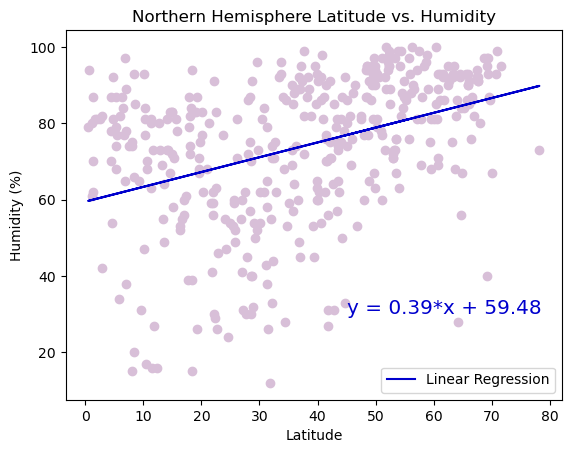

In [17]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Humidity']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Humidity (%)", 
                  "Northern Hemisphere Latitude vs. Humidity", 
                  "thistle",
                  45,
                  30)

The r-value is  0.287667211341476


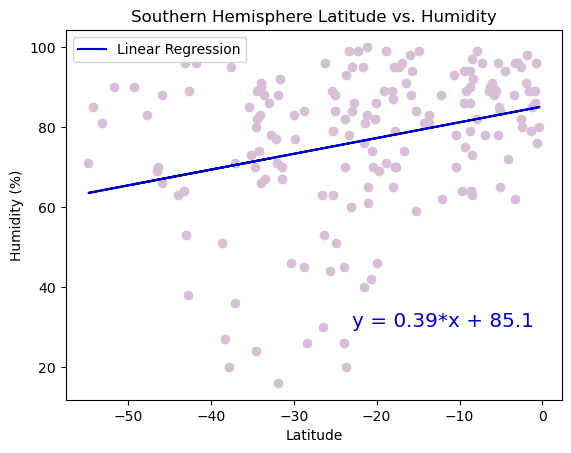

In [18]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Humidity']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Humidity (%)", 
                  "Southern Hemisphere Latitude vs. Humidity", 
                  "thistle",
                  -23,
                  30)

**Discussion about the linear relationship:** Here we see that in the southern hemisphere, there is a correlation between higher humidity and closer distance to the equator. The slope is not as steep as the relationship between latitude and maximum temperature, indicating that the relationship is not as strong. Interestingly, in the northern hemisphere the correlation is opposite, the further a location is from the equator the more humid it tends to be. This suggests that locations tend to be more humid the farther North they are, regardless of distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is  0.2680911262101346


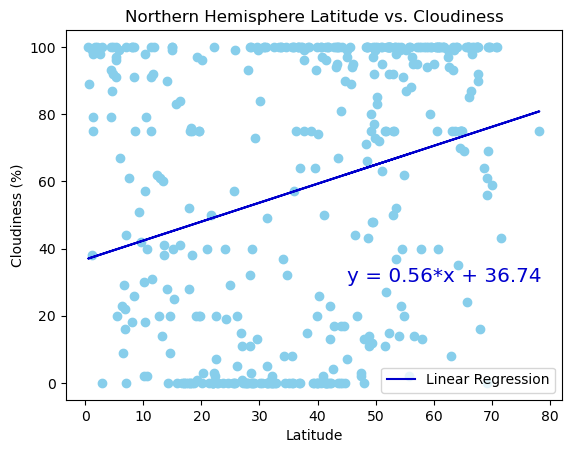

In [19]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Cloudiness']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Cloudiness (%)", 
                  "Northern Hemisphere Latitude vs. Cloudiness", 
                  "skyblue",
                  45,
                  30)

The r-value is  0.3852565155393451


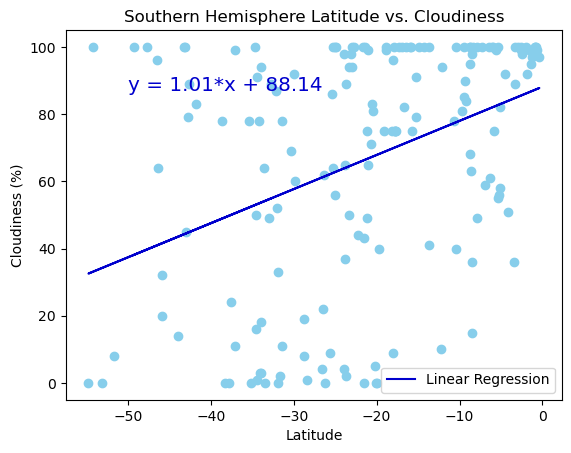

In [20]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Cloudiness']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Cloudiness (%)", 
                  "Southern Hemisphere Latitude vs. Cloudiness", 
                  "skyblue",
                  -50,
                  87)

**Discussion about the linear relationship:** Here we see that in the sourthern hemisphere there is also a correlation between the cloudiness of a location and being closer to the equator. Similar to humidity, in the northern hemisphere the correlation is opposite, the farther a location is from the equator (aka, the farther north it is) the cloudier it tends to be. This suggests that humidity and cloudiness may be related also.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is  0.1344425916082244


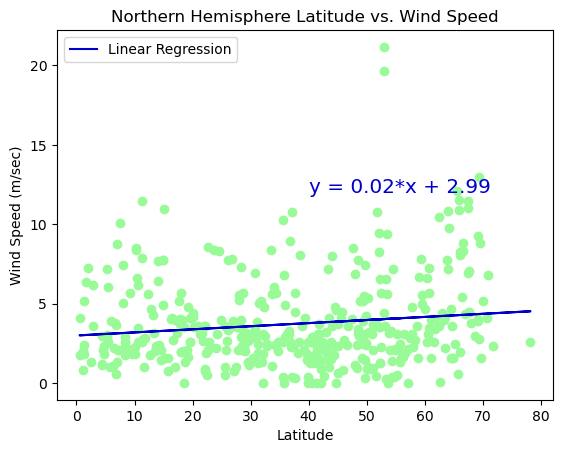

In [21]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Wind Speed']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Wind Speed (m/sec)", 
                  "Northern Hemisphere Latitude vs. Wind Speed", 
                  "palegreen",
                  40,
                  12)

The r-value is  -0.18591058767495017


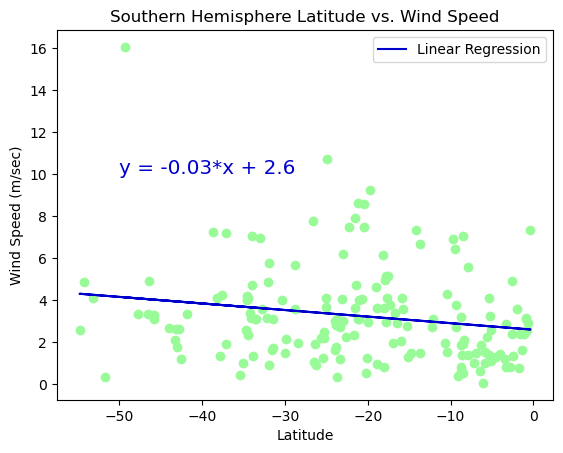

In [22]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Wind Speed']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Wind Speed (m/sec)", 
                  "Southern Hemisphere Latitude vs. Wind Speed", 
                  "palegreen",
                  -50,
                  10)

**Discussion about the linear relationship:** Here we can see that there is a weak correlation between greater distance from the equator and higher wind speeds in both the northern and southern hemispheres. This is likely due to global wind patterns.